In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
flats = pd.read_csv('/content/drive/MyDrive/MTech/Project/flats_cleaned.csv')
houses = pd.read_csv('/content/drive/MyDrive/MTech/Project/house_cleaned.csv')


In [5]:
properties = pd.concat([flats,houses], ignore_index=True)

In [6]:
properties.shape

(3961, 20)

In [7]:

properties.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Krishna Colony,flat,maa bhagwati residency,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,"Krishna Colony, Gurgaon, Haryana",4,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ..."
1,2 BHK Flat in Ashok Vihar,flat,apna enclave,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,"46b, Ashok Vihar, Gurgaon, Haryana",1,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,2 BHK Flat in Sohna,flat,tulsiani easy in homes,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,"Sohna, Gurgaon, Haryana",12,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ..."
3,2 BHK Flat in Sector 61 Gurgaon,flat,smart world orchard,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,study room,"Sector 61 Gurgaon, Gurgaon, Haryana",2,NaN,Dec 2023,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN
4,2 BHK Flat in Sector 92 Gurgaon,flat,parkwood westend,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2,2,3,study room,"Sector 92 Gurgaon, Gurgaon, Haryana",5,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ..."


In [8]:
properties.insert(loc=3,column='sector',value=properties['property_name'].str.split('in').str.get(1).str.replace('Gurgaon','').str.strip())


In [9]:
properties['sector'] = properties['sector'].str.lower()

In [10]:
properties['sector'].value_counts()

sohna                                                        163
sector 102                                                   113
sector 85                                                    110
sector 92                                                    104
sector 69                                                     94
sector 81                                                     90
sector 90                                                     90
sector 65                                                     90
sector 109                                                    88
sector 79                                                     80
sector 83                                                     69
sector 37d                                                    68
sector 86                                                     67
sector 104                                                    66
sector 107                                                    60
sector 108               

In [11]:
properties.shape

(3961, 21)

In [12]:
properties.drop(columns=['property_name', 'address', 'description', 'rating'],inplace=True)

In [13]:
properties.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,maa bhagwati residency,krishna colony,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,4,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...","['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F..."
1,flat,apna enclave,ashok vihar,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,1,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',..."
2,flat,tulsiani easy in homes,sohna,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,12,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian..."
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,study room,2,NaN,Dec 2023,"['Sector 55-56 Metro station', 'Bestech Centra...",NaN,"['Security / Fire Alarm', 'Private Garden / Te..."
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2,2,3,study room,5,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",[],NaN


In [14]:
properties.shape

(3961, 17)

## **Feature Engineering**


## **areaWithType**

In [15]:
properties.head(10)[['price','area','areaWithType']]

,price,area,areaWithType
0,0.45,900.0,Carpet area: 900 (83.61 sq.m.)
1,0.50,650.0,Carpet area: 650 (60.39 sq.m.)
2,0.40,595.0,Carpet area: 595 (55.28 sq.m.)
3,1.47,1200.0,Carpet area: 1200 (111.48 sq.m.)
4,0.70,1345.0,Super Built up area 1345(124.95 sq.m.)
5,0.41,654.0,Built Up area: 654 (60.76 sq.m.)
6,2.00,1500.0,Super Built up area 1500(139.35 sq.m.)
7,1.80,2290.0,Carpet area: 2290 (212.75 sq.m.)
8,1.10,1350.0,Built Up area: 1350 (125.42 sq.m.)Carpet area:...
9,4.75,2813.0,Built Up area: 2813 (261.34 sq.m.)


In [16]:
properties['areaWithType'].value_counts()

Plot area 360(301.01 sq.m.)                                                                                                     38
Plot area 300(250.84 sq.m.)                                                                                                     27
Plot area 200(167.23 sq.m.)                                                                                                     20
Plot area 270(225.75 sq.m.)                                                                                                     19
Plot area 502(419.74 sq.m.)                                                                                                     19
Super Built up area 1950(181.16 sq.m.)Carpet area: 1161 sq.ft. (107.86 sq.m.)                                                   17
Super Built up area 1350(125.42 sq.m.)                                                                                          17
Super Built up area 1578(146.6 sq.m.)                                              

In [17]:
# text = 'Super Built up area 1345(124.95 sq.m.)'

# match = re.search(r'Super Built up area (\d+\.?\d*)',text)
# print(match.group(1))

def extract_area(text, area_type):
    pattern = re.escape(area_type) + r'[:,]?\s*(\d+(\.\d*)?)'
    match = re.search(pattern, text)
    if match:
        return float(match.group(1))
    return None

In [18]:
properties['super_built_up_area'] = properties['areaWithType'].apply(lambda x: extract_area(x, 'Super Built up area'))
properties['built_up_area'] = properties['areaWithType'].apply(lambda x: extract_area(x, 'Built Up area'))
properties['carpet_area'] = properties['areaWithType'].apply(lambda x: extract_area(x, 'Carpet area'))


In [19]:
properties.head(10)[['price','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,area,areaWithType,super_built_up_area,built_up_area,carpet_area
5,0.41,654.0,Built Up area: 654 (60.76 sq.m.),NaN,654.0,NaN
7,1.80,2290.0,Carpet area: 2290 (212.75 sq.m.),NaN,NaN,2290.0
0,0.45,900.0,Carpet area: 900 (83.61 sq.m.),NaN,NaN,900.0
2,0.40,595.0,Carpet area: 595 (55.28 sq.m.),NaN,NaN,595.0
8,1.10,1350.0,Built Up area: 1350 (125.42 sq.m.)Carpet area:...,NaN,1350.0,1050.0


In [20]:
properties[~((properties['super_built_up_area'].isnull()) | (properties['built_up_area'].isnull()) | (properties['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape


(537, 7)

In [21]:
all_nan_properties = properties[((properties['super_built_up_area'].isnull()) & (properties['built_up_area'].isnull()) & (properties['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]


In [22]:
all_nan_properties

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2997,5.25,house,2610.0,Plot area 290(242.48 sq.m.),NaN,NaN,NaN
2998,5.70,house,539.0,Plot area 539(50.07 sq.m.),NaN,NaN,NaN
2999,2.10,house,549.0,Plot area 61(51 sq.m.),NaN,NaN,NaN
3000,5.00,house,1161.0,Plot area 129(107.86 sq.m.),NaN,NaN,NaN
3001,3.00,house,558.0,Plot area 62(51.84 sq.m.),NaN,NaN,NaN
3002,4.50,house,1152.0,Plot area 128(107.02 sq.m.),NaN,NaN,NaN
3003,12.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
3004,20.00,house,4091.0,Plot area 500(418.06 sq.m.),NaN,NaN,NaN
3005,10.85,house,2844.0,Plot area 316(264.22 sq.m.),NaN,NaN,NaN
3006,1.95,house,1935.0,Plot area 215(179.77 sq.m.),NaN,NaN,NaN


In [23]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

all_nan_properties['built_up_area'] = all_nan_properties['areaWithType'].apply(extract_plot_area)
all_nan_properties

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2997,5.25,house,2610.0,Plot area 290(242.48 sq.m.),NaN,290.00,NaN
2998,5.70,house,539.0,Plot area 539(50.07 sq.m.),NaN,539.00,NaN
2999,2.10,house,549.0,Plot area 61(51 sq.m.),NaN,61.00,NaN
3000,5.00,house,1161.0,Plot area 129(107.86 sq.m.),NaN,129.00,NaN
3001,3.00,house,558.0,Plot area 62(51.84 sq.m.),NaN,62.00,NaN
3002,4.50,house,1152.0,Plot area 128(107.02 sq.m.),NaN,128.00,NaN
3003,12.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
3004,20.00,house,4091.0,Plot area 500(418.06 sq.m.),NaN,500.00,NaN
3005,10.85,house,2844.0,Plot area 316(264.22 sq.m.),NaN,316.00,NaN
3006,1.95,house,1935.0,Plot area 215(179.77 sq.m.),NaN,215.00,NaN


In [24]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [25]:
all_nan_properties['built_up_area'] = all_nan_properties.apply(convert_scale,axis=1)
all_nan_properties

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2997,5.25,house,2610.0,Plot area 290(242.48 sq.m.),NaN,2610.00,NaN
2998,5.70,house,539.0,Plot area 539(50.07 sq.m.),NaN,539.00,NaN
2999,2.10,house,549.0,Plot area 61(51 sq.m.),NaN,549.00,NaN
3000,5.00,house,1161.0,Plot area 129(107.86 sq.m.),NaN,1161.00,NaN
3001,3.00,house,558.0,Plot area 62(51.84 sq.m.),NaN,558.00,NaN
3002,4.50,house,1152.0,Plot area 128(107.02 sq.m.),NaN,1152.00,NaN
3003,12.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
3004,20.00,house,4091.0,Plot area 500(418.06 sq.m.),NaN,500.00,NaN
3005,10.85,house,2844.0,Plot area 316(264.22 sq.m.),NaN,2844.00,NaN
3006,1.95,house,1935.0,Plot area 215(179.77 sq.m.),NaN,1935.00,NaN


In [26]:
# update the original dataframe
properties.update(all_nan_properties)

In [27]:
properties.isnull().sum()

property_type             0
society                   1
sector                    0
price                    20
price_per_sqft           20
area                     20
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 21
facing                 1177
agePossession             1
nearbyLocations         207
furnishDetails         1032
features                709
super_built_up_area    2027
built_up_area          2113
carpet_area            1958
dtype: int64

## **Additional Room**

In [28]:
properties['additionalRoom'].fillna("not available",inplace=True)

In [29]:
properties['additionalRoom'].value_counts()

not available                                    1691
servant room                                      710
study room                                        251
others                                            237
pooja room                                        170
store room                                        107
study room,servant room                           100
pooja room,servant room                            84
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 57
pooja room,study room,servant room,others          57
servant room,pooja room                            38
servant room,store room                            34
study room,others                                  30
pooja room,study room                              24
pooja room,others                                  17
pooja room,store room                              17
servant room,study room     

In [30]:

new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    properties[col] = properties['additionalRoom'].str.contains(col).astype(int)

In [31]:
properties.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
1395,flat,ss the leaf,sector 85,1.93,8075.0,2390.0,Super Built up area 2408(223.71 sq.m.)Built Up...,3,4,3,servant room,7,North-East,1 to 5 Year Old,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Cen...","['3 Wardrobe', '4 Fan', '10 Light', 'No AC', '...","['Centrally Air Conditioned', 'Water purifier'...",2408.0,2400.0,2390.0,0,1,0,0,0
3314,house,independent,faridabad road,0.35,3500.0,1000.0,Plot area 1000(92.9 sq.m.),1,4,1,not available,1.0,NaN,5 to 10 Year Old,NaN,NaN,NaN,NaN,1000.0,NaN,0,0,0,0,0
2842,flat,my home,new palam vihar,0.22,4400.0,500.0,Carpet area: 500 (46.45 sq.m.),2,2,1,not available,1,NaN,0 to 1 Year Old,"['Palam Vihar Vyapar kendra', 'Palam triangle'...","['3 Fan', '1 Exhaust Fan', '15 Light', '1 Modu...",NaN,NaN,NaN,500.0,0,0,0,0,0
2378,flat,signature global solera 2,sector 107,0.50,8928.0,560.0,Carpet area: 560 (52.03 sq.m.),2,2,2,not available,13,NaN,0 to 1 Year Old,"['Dwarka Expressway', 'Delhi', 'IGI Airport']","['3 Fan', '1 Exhaust Fan', '5 Light', '1 Modul...","['Lift(s)', 'Park']",NaN,NaN,560.0,0,0,0,0,0
415,flat,m3m golfestate,sector 65,5.20,17455.0,2979.0,Super Built up area 2979(276.76 sq.m.),3,3,3,"study room,servant room",18,North,1 to 5 Year Old,"['Sector 54 Chowk Metro Station', 'Sahara Mall...","['7 Fan', '9 Light', '6 AC', '1 Modular Kitche...","['Intercom Facility', 'Lift(s)', 'High Ceiling...",2979.0,NaN,NaN,1,1,0,0,0


## **agePossession**

In [32]:
properties['agePossession'].value_counts()

1 to 5 Year Old       1705
5 to 10 Year Old       610
0 to 1 Year Old        551
undefined              358
10+ Year Old           353
Under Construction      92
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Aug 2023                 7
Dec 2025                 7
Jun 2024                 7
Aug 2024                 5
Nov 2023                 5
Sep 2023                 4
Jul 2024                 4
Oct 2023                 4
Jan 2025                 4
By 2025                  4
May 2024                 3
Feb 2024                 3
Nov 2024                 3
Jul 2025                 2
Jun 2027                 2
Mar 2025                 2
Jan 2026                 2
Aug 2025                 2
Oct 2025                 2
By 2027                  2
Jul 2027                 2
Apr 2026                 2
D

In [33]:
def converting_to_category(value):
  if pd.isna(value):
    return 'undefined'
  if '0 to 1 Year Old' in value or 'Within 6 months' in value or 'Within 3 months' in value:
    return 'new Property'
  if '1 to 5 Year Old' in value:
    return 'relativelt new'
  if '5 to 10 Year Old' in value:
    return 'moderately old'
  if '10+ Year Old' in value:
    return 'old property'
  if "Under Construction" in value or "By" in value:
        return "under construction"
  try:
      # For entries like 'May 2024'
      int(value.split(" ")[-1])
      return "under construction"
  except:
      return "undefined"

In [34]:
properties['agePossession'] = properties['agePossession'].apply(converting_to_category)


In [35]:
properties['agePossession'].value_counts()

relativelt new        1705
new Property           647
moderately old         610
undefined              359
old property           353
under construction     287
Name: agePossession, dtype: int64

In [37]:
properties.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,maa bhagwati residency,krishna colony,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,4,West,relativelt new,"['Chintapurni Mandir', 'State bank ATM', 'Pear...","['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...",NaN,NaN,900.0,0,0,0,0,0
1,flat,apna enclave,ashok vihar,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,1,West,old property,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...",NaN,NaN,650.0,0,0,0,0,0


## **furnishDetails**

In [43]:
properties.sample(5)[['furnishDetails','features']]

,furnishDetails,features
2494,[],['Visitor Parking']
185,NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s..."
399,"['5 AC', 'No Bed', 'No Chimney', 'No Curtains'...","['Feng Shui / Vaastu Compliant', 'Security / F..."
2131,"['1 Water Purifier', '5 Fan', '1 Exhaust Fan',...","['Security / Fire Alarm', 'Private Garden / Te..."
367,"['4 Wardrobe', '6 Fan', '1 Exhaust Fan', '4 Ge...","['Security / Fire Alarm', 'Lift(s)', 'Water St..."


In [44]:
properties.iloc[2131]['furnishDetails']

"['1 Water Purifier', '5 Fan', '1 Exhaust Fan', '10 Light', '2 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine']"

In [45]:
properties.iloc[2131]['features']

"['Security / Fire Alarm', 'Private Garden / Terrace', 'Swimming Pool', 'Visitor Parking', 'Security Personnel', 'Club house / Community Center', 'Waste Disposal']"

In [49]:
# Extracting all unique furnishings from furnishDetails column
all_furnishings = []
for detail in properties['furnishDetails'].dropna():
  furnishings = detail.replace('[','').replace(']','').replace("'","").split(', ')
  all_furnishings.extend(furnishings)
unique_furnishing = list(set(all_furnishings))
unique_furnishing

['',
 '7 AC',
 '12 Bed',
 '14 Geyser',
 '9 Fan',
 '15 Geyser',
 '36 Bed',
 '26 AC',
 '99 Light',
 '26 Wardrobe',
 'No Dining Table',
 '4 Geyser',
 '15 Fan',
 '22 Light',
 '8 Wardrobe',
 'No Chimney',
 '8 Light',
 '11 AC',
 '3 Geyser',
 '13 Fan',
 '10 TV',
 '14 Wardrobe',
 '24 Light',
 'No Microwave',
 'No Water Purifier',
 '24 Wardrobe',
 '272 Light',
 '41 Light',
 '31 Light',
 '9 Wardrobe',
 '7 Wardrobe',
 '7 Curtains',
 '38 Fan',
 '3 Microwave',
 '5 AC',
 '1 Fan',
 '2 Curtains',
 '16 AC',
 '21 Geyser',
 '69 Light',
 '14 TV',
 '1 Stove',
 '2 Bed',
 '4 AC',
 'No Geyser',
 '13 Wardrobe',
 'No Curtains',
 '16 Wardrobe',
 '78 Light',
 '56 Light',
 'No TV',
 '35 Light',
 '10 Geyser',
 '6 AC',
 '38 Light',
 '12 Fan',
 '21 Bed',
 '21 Curtains',
 '18 Geyser',
 '20 Bed',
 '4 Fan',
 '70 Light',
 '11 Curtains',
 '5 TV',
 '2 Light',
 '7 Fan',
 '2 AC',
 '6 Light',
 '13 Light',
 '18 AC',
 '4 Light',
 '25 Light',
 '11 Geyser',
 '16 Light',
 '1 Chimney',
 '60 Light',
 '13 TV',
 '2 Chimney',
 '6 Curta

In [51]:
# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishing]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    properties[furnishing] = properties['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = properties[['furnishDetails'] + columns_to_include]
furnishings_df.head()

,furnishDetails,Modular Kitchen,Wardrobe,Dining Table,Bed,Light,AC,Stove,TV,Exhaust Fan,Fan,Water Purifier,Washing Machine,Curtains,Sofa,Chimney,Fridge,Microwave,Geyser
0,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...",0,1,0,0,4,0,0,0,0,3,0,0,0,0,0,0,0,0
1,"['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...",1,3,0,0,3,0,0,0,1,4,0,0,1,0,1,0,0,1
2,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
furnishings_df.shape

(3961, 19)

In [53]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

<ipython-input-53-e4dadedf8e21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [54]:
furnishings_df.sample(5)

,Modular Kitchen,Wardrobe,Dining Table,Bed,Light,AC,Stove,TV,Exhaust Fan,Fan,Water Purifier,Washing Machine,Curtains,Sofa,Chimney,Fridge,Microwave,Geyser
665,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2216,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3638,1,3,0,0,8,5,1,0,0,6,0,0,0,0,1,0,1,0
3052,1,4,0,0,36,6,0,0,1,12,1,0,0,0,1,0,0,4
2839,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## **Using furnishings_df dataframe for Kmeans clustering**

In [55]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)
scaled_data

array([[-0.80477981, -0.1494511 , -0.19423172, ..., -0.23541947,
        -0.24073741, -0.50357396],
       [ 1.2425759 ,  0.62235568, -0.19423172, ..., -0.23541947,
        -0.24073741, -0.05533655],
       [-0.80477981, -0.53535449, -0.19423172, ..., -0.23541947,
        -0.24073741, -0.50357396],
       ...,
       [-0.80477981, -0.53535449, -0.19423172, ..., -0.23541947,
        -0.24073741, -0.50357396],
       [-0.80477981, -0.53535449, -0.19423172, ..., -0.23541947,
        -0.24073741, -0.50357396],
       [ 1.2425759 ,  1.00825907,  5.14848953, ...,  4.24773695,
         3.23941182,  1.73761306]])

In [57]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

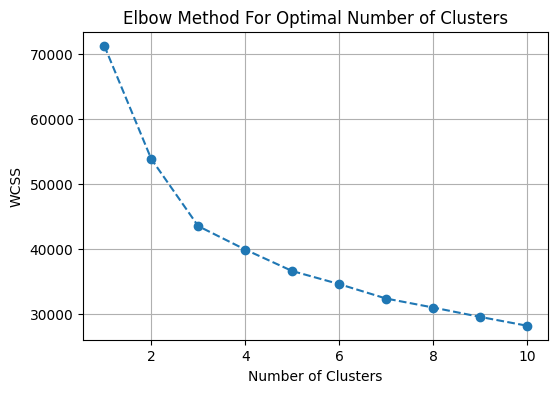

In [62]:
plt.figure(figsize=(6, 4))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [63]:

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

cluster_assignments = kmeans.predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [68]:
properties = properties.iloc[:,:-18]

In [69]:
properties['furnishing_type'] = cluster_assignments
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

In [96]:
properties.sample(5)[['furnishDetails','furnishing_type']]

,furnishDetails,furnishing_type
1076,NaN,2
620,"['1 Water Purifier', '5 Fan', '1 Fridge', '1 E...",1
2155,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...",2
3392,NaN,2
3649,"['5 Wardrobe', '7 Fan', '1 Exhaust Fan', '5 Ge...",0


In [102]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
properties.drop(columns=['nearbyLocations','furnishDetails','features','additionalRoom'],inplace=True)

In [103]:
properties.shape

(3961, 22)

In [104]:
properties.to_csv('gurgaon_properties_cleaned.csv',index=False)
